# Projet Datascientest - Compagnon immo

<code>mar25_bds_compagnon_immo_1</code>

---

## Visualisation de données - v1.0

In [35]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler

### Visualisations annonces ventes et locations (dep 68)

In [37]:
url_sales = 'https://raw.githubusercontent.com/klopstock-dviz/immo_vis/master/data/ech_annonces_ventes_68.csv'
url_rentals = 'https://raw.githubusercontent.com/klopstock-dviz/immo_vis/master/data/ech_annonces_locations_68.csv'

sales_df = pd.read_csv(url_sales, sep=';', index_col="idannonce")
rentals_df = pd.read_csv(url_rentals, sep=';', index_col="idannonce")

> Recherche valeurs extrêmes et/ou aberrantes

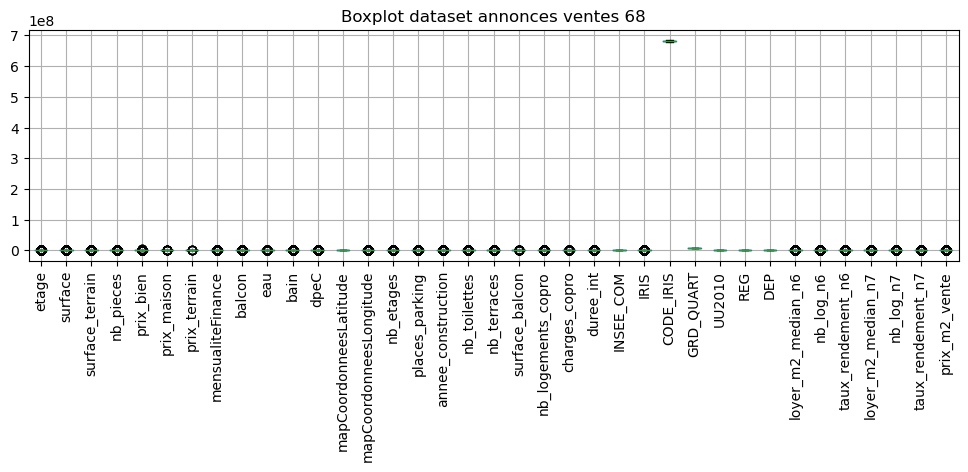

In [13]:
plt.figure(figsize=(12, 3))
plt.title("Boxplot dataset annonces ventes 68")
sales_df.boxplot(rot=90)
plt.show();

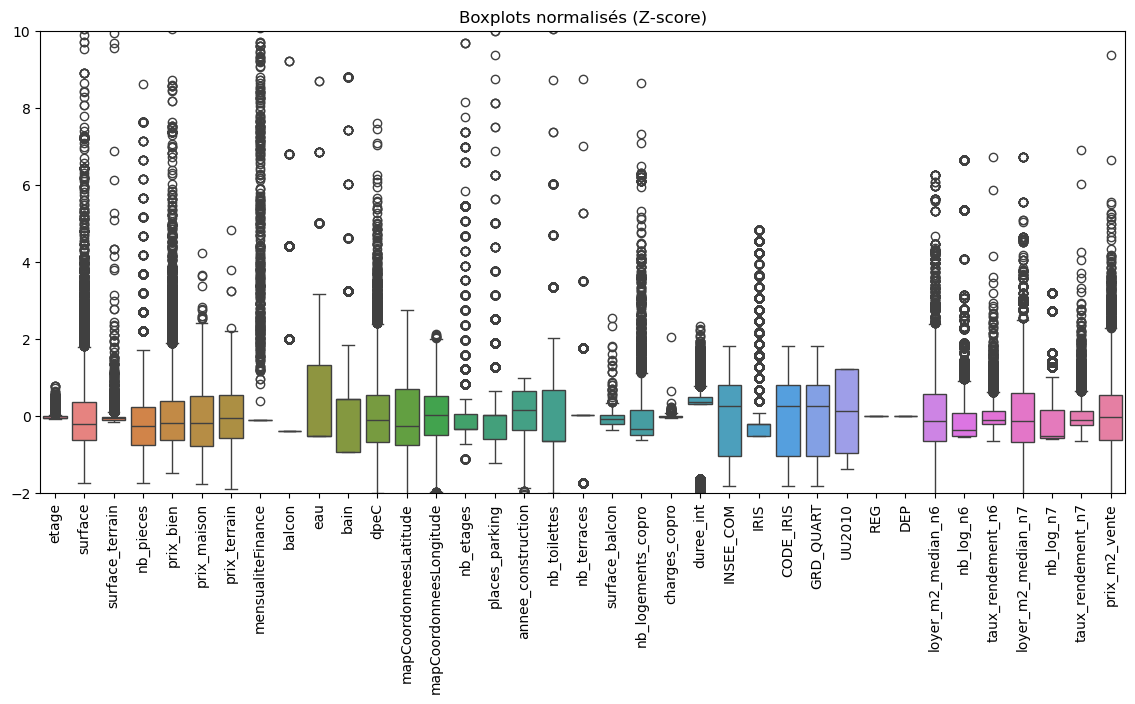

In [251]:
num_cols = sales_df.select_dtypes(include='number').columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_df[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)

plt.figure(figsize=(14, 6))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=90)
plt.ylim(-2, 10)
plt.title("Boxplots normalisés (Z-score)")
plt.show();

> Visualisations outliers

In [39]:
import math

def plot_subplots(dataframe, cols, cols_per_row=4, fig_height=5, plot_function=None, use_legend=False, **kwargs):
    """
    Crée des subplots dynamiques pour les colonnes données avec un modèle de graphique flexible.
    
    :param dataframe: DataFrame Pandas contenant les données.
    :param cols: Colonnes à visualiser (numériques ou catégorielles).
    :param cols_per_row: Nombre de colonnes par ligne.
    :param plot_function: Fonction utilisée pour tracer le graphique (ex. sns.boxplot ou pd.Series.plot.pie).
    :param use_legend: Utiliser une légende au lieu des labels (pour les pie charts).
    :param kwargs: Paramètres supplémentaires pour la fonction de traçage.
    """
    num_cols = len(cols)
    num_rows = math.ceil(num_cols / cols_per_row)  # Calcul dynamique des lignes

    # Créer les subplots
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, fig_height * num_rows))

    # Si les axes sont à 1 dimension, convertir en tableau
    if num_rows == 1:
        axes = axes.reshape(1, -1)

    # Boucler sur les colonnes et tracer les graphiques
    for idx, col in enumerate(cols):
        row = idx // cols_per_row
        col_pos = idx % cols_per_row
        
        if dataframe[col].dtype == 'object':  # Pour les colonnes catégorielles
            data_counts = dataframe[col].value_counts()
            data_counts.plot.pie(ax=axes[row, col_pos], labels=None if use_legend else data_counts.index, autopct='%1.1f%%')
            if use_legend:
                axes[row, col_pos].legend(labels=data_counts.index, loc="upper left", fontsize=8)
        else:  # Pour les colonnes numériques
            plot_function(data=dataframe, y=col, ax=axes[row, col_pos], **kwargs)
        
        axes[row, col_pos].set_title(col, fontsize=10)

    # Supprimer les axes inutilisés
    for idx in range(len(cols), num_rows * cols_per_row):
        row = idx // cols_per_row
        col_pos = idx % cols_per_row
        axes[row, col_pos].axis('off')  # Désactiver le subplot inutilisé

    plt.tight_layout()
    plt.show()

#### Dataset ventes

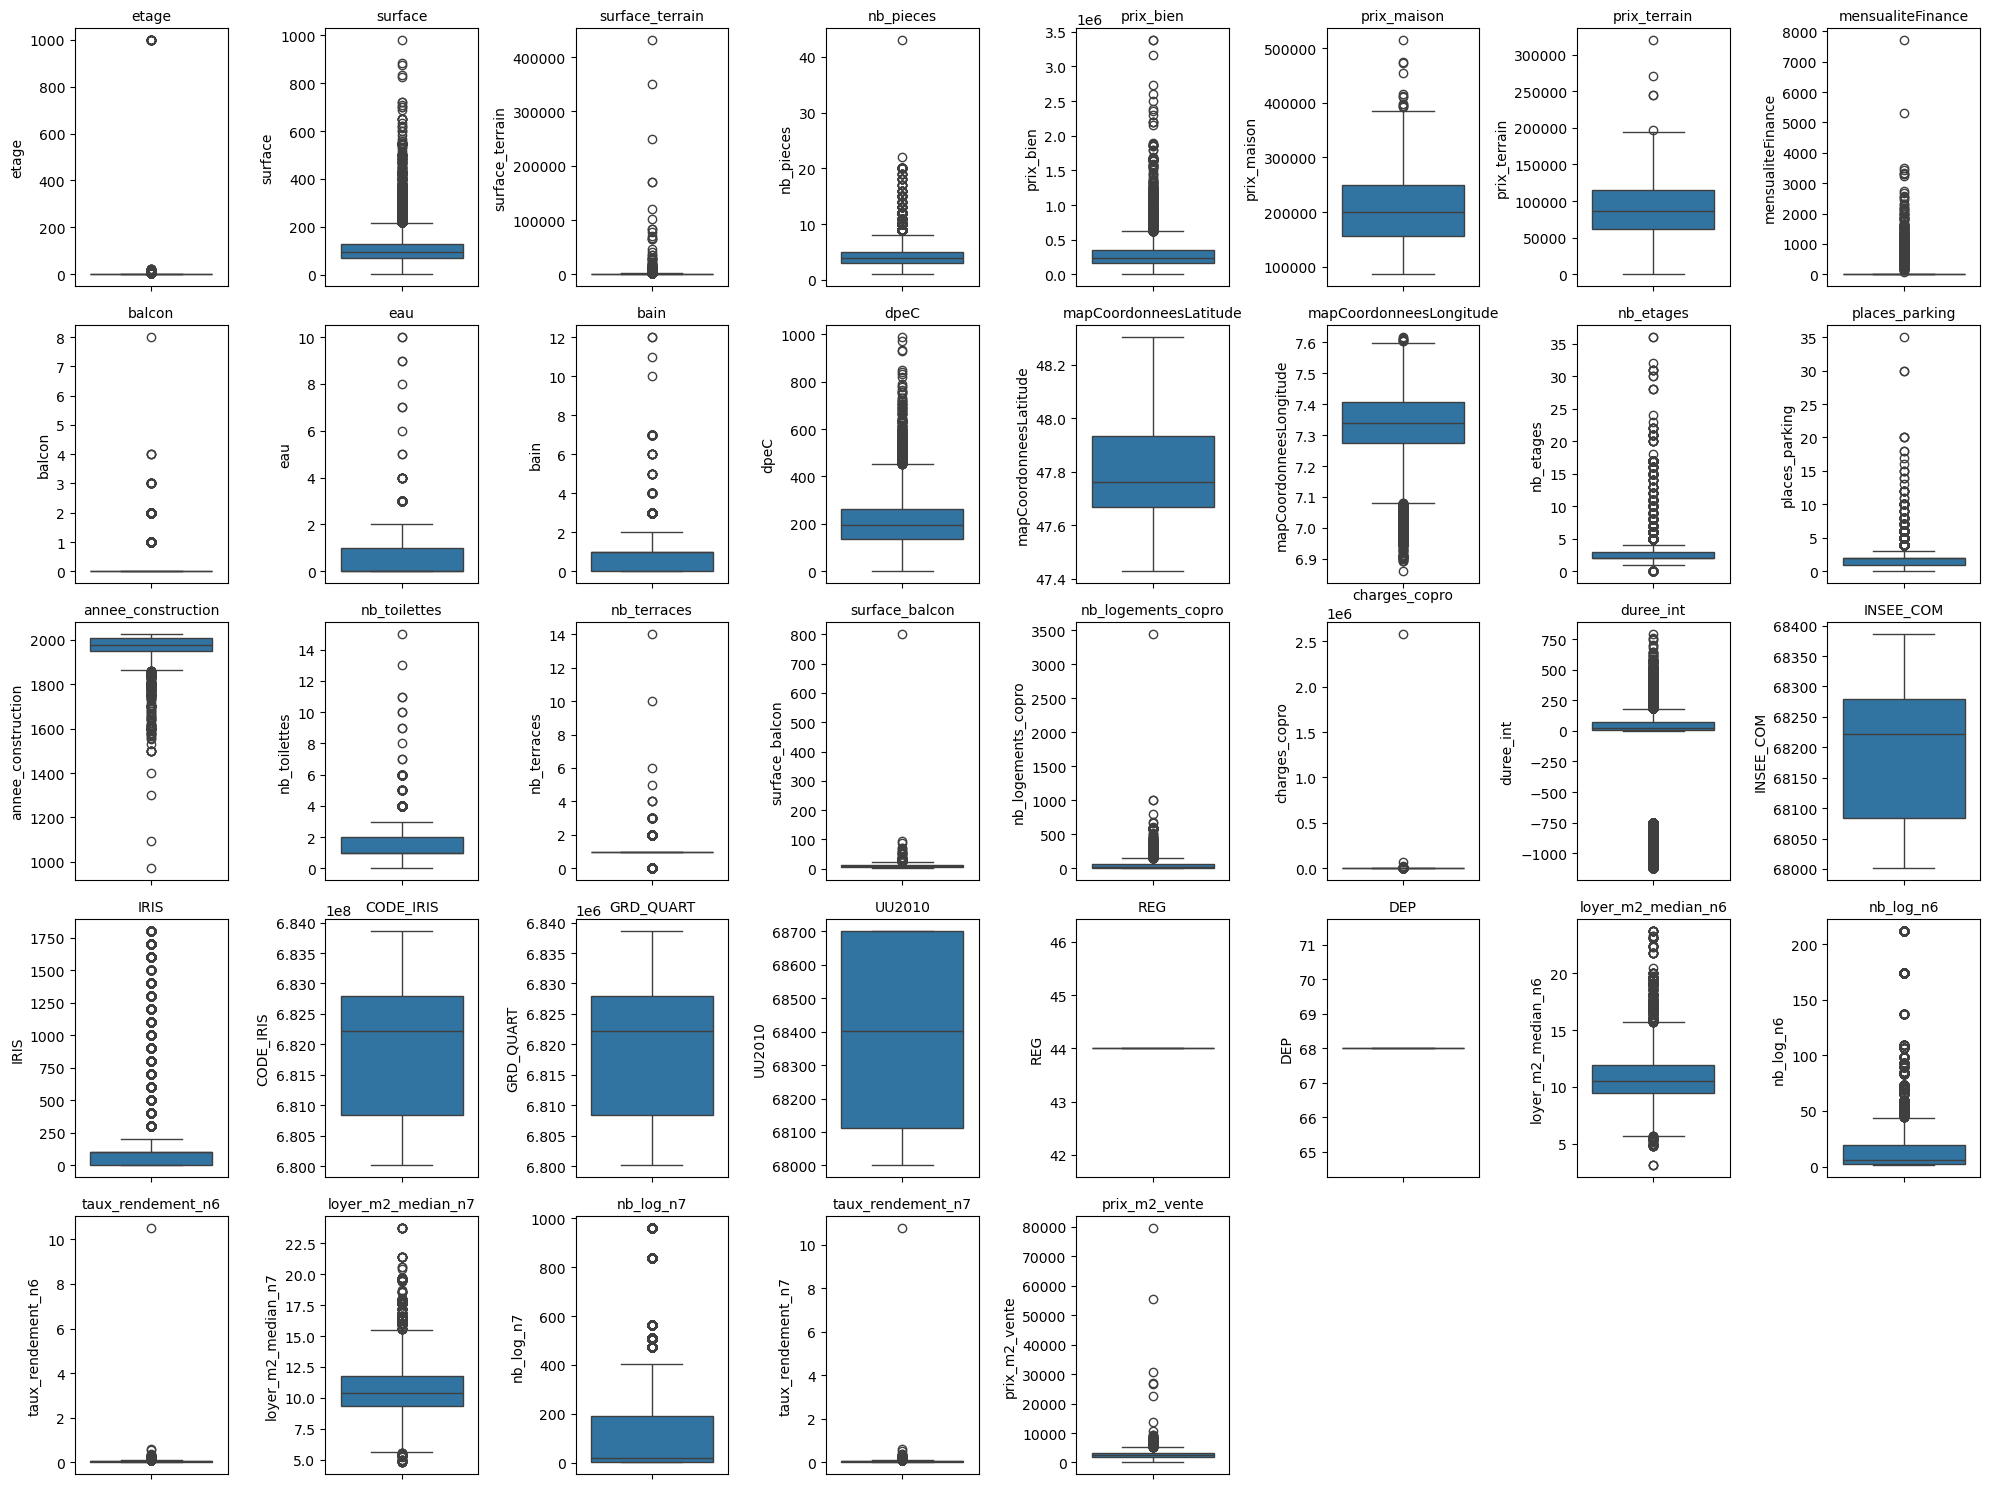

In [71]:
num_cols = sales_df.select_dtypes(include=['number']).columns
plot_subplots(sales_df, num_cols, cols_per_row=8, fig_height=3, plot_function=sns.boxplot)

> Répartition variables catégorielles

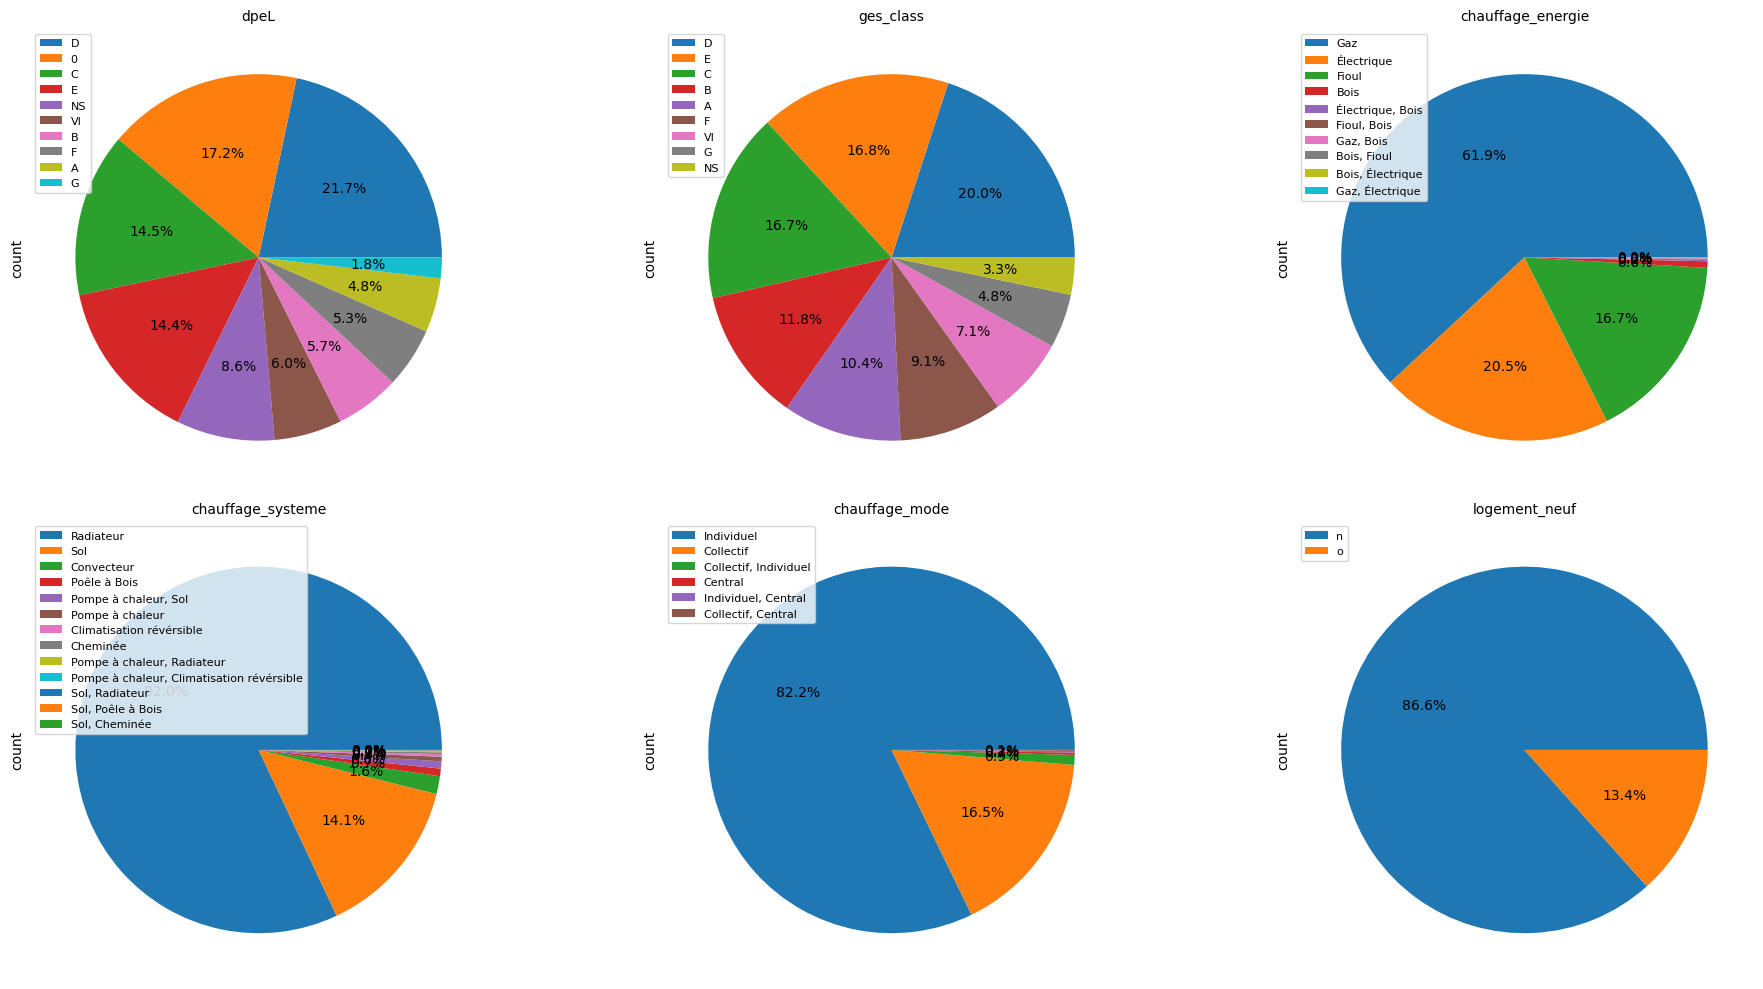

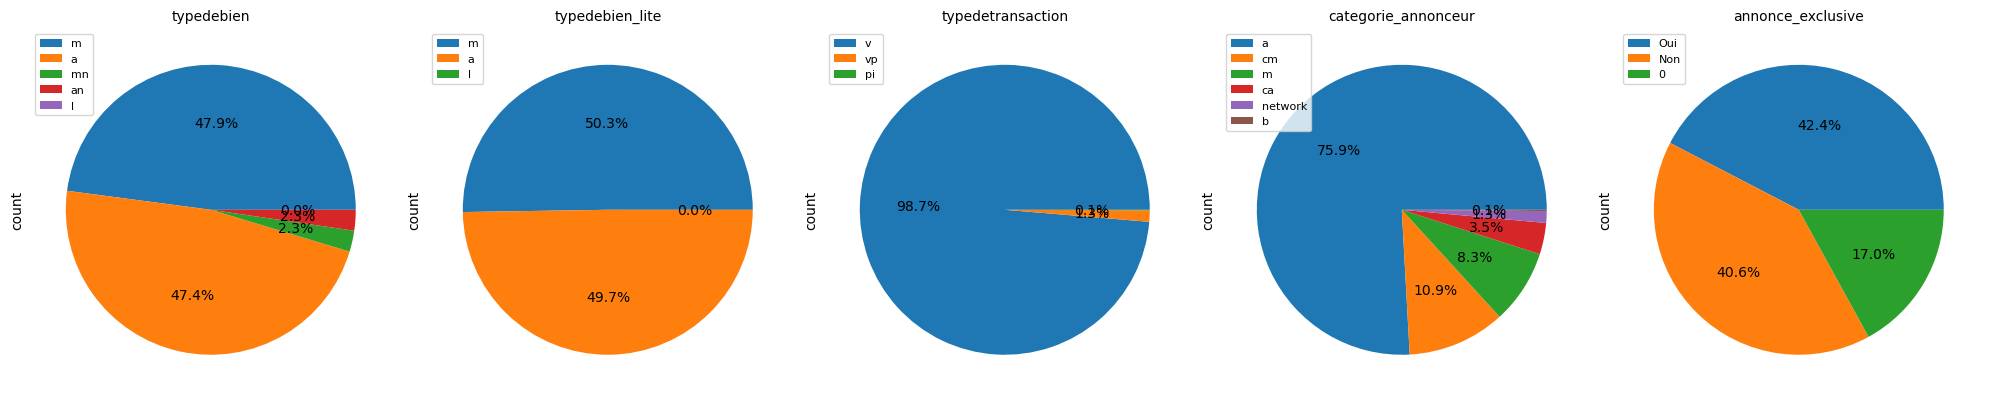

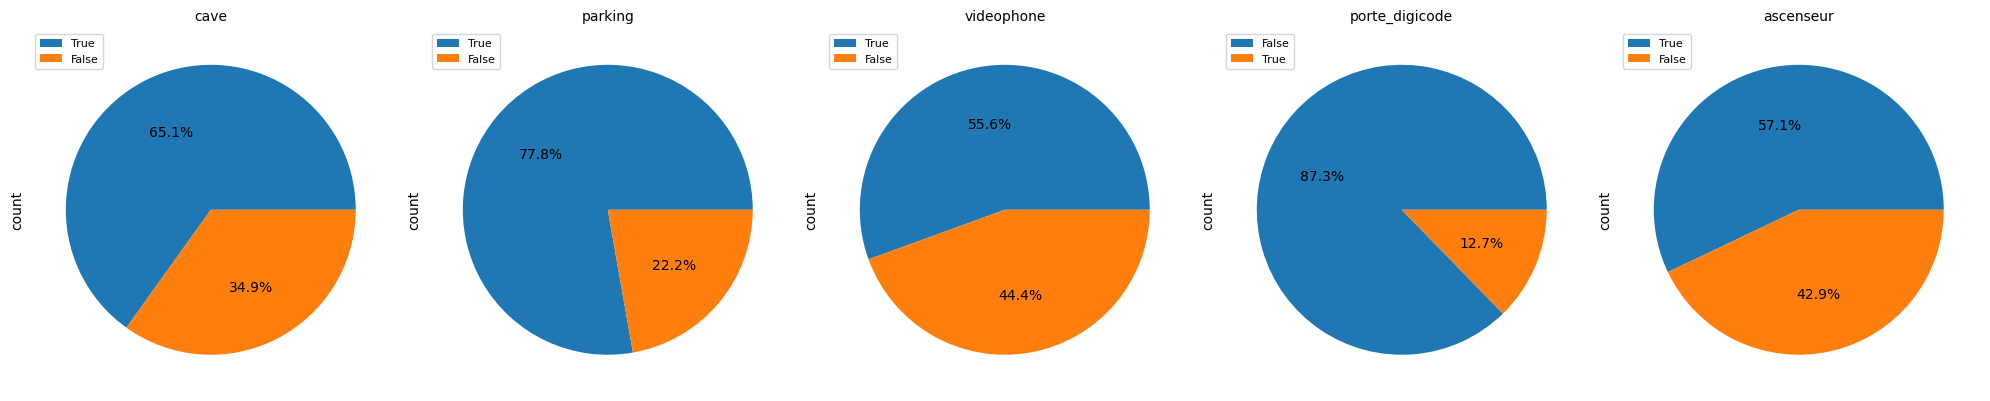

In [77]:
cols_energy = ['dpeL', 'ges_class', 'chauffage_energie', 'chauffage_systeme', 'chauffage_mode', 'logement_neuf']
plot_subplots(sales_df, cols_energy, cols_per_row=3, use_legend=True)

cols_types = ['typedebien', 'typedebien_lite', 'typedetransaction', 'categorie_annonceur', 'annonce_exclusive']
plot_subplots(sales_df, cols_types, cols_per_row=5, use_legend=True)

cols_options = ['cave', 'parking', 'videophone', 'porte_digicode', 'ascenseur']
plot_subplots(sales_df, cols_options, cols_per_row=5, use_legend=True)

> **Informations correlations**

In [285]:
num_cols = sales_df.select_dtypes(include=['number'])
cat_cols = sales_df.select_dtypes(include=['object'])

> Tests statistiques dataset ventes

In [75]:
correlations = sales_df.select_dtypes('number').corr(method='pearson')['prix_m2_vente']
strong_correlations = correlations[(correlations >= 0.3) | (correlations <= -0.3)]
del strong_correlations['prix_m2_vente']
correlation_df = pd.DataFrame({
    'Variable': strong_correlations.index,
    'Correlation': strong_correlations.values
}).set_index('Variable')

correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

correlation_df

,Correlation
Variable,
prix_maison,0.564392
prix_bien,0.456683
prix_terrain,0.411954
annee_construction,0.390980
mapCoordonneesLongitude,0.325657
dpeC,-0.322553


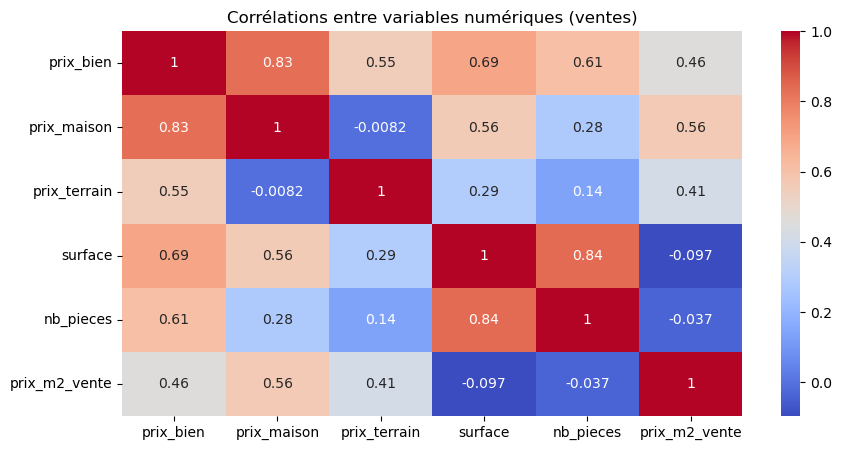

In [310]:
plt.figure(figsize=(10, 5))
sns.heatmap(sales_df[['prix_bien', 'prix_maison', 'prix_terrain', 'surface', 'nb_pieces', 'prix_m2_vente']].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélations entre variables numériques (ventes)")
plt.show();

In [291]:
threshold = 0.3
correlation_matrix = num_cols.corr()

cor_target = correlation_matrix["prix_m2_vente"].sort_values(ascending=False)

print("--- Matrice de correlation ---\n")
print("Variables corrélées\n")
print(cor_target[abs(cor_target) > threshold].index.tolist())

print("\nVariables non corrélées\n")
print(cor_target[abs(cor_target) < threshold].index.tolist())

--- Matrice de correlation ---

Variables corrélées

['prix_m2_vente', 'prix_maison', 'prix_bien', 'prix_terrain', 'annee_construction', 'mapCoordonneesLongitude', 'dpeC']

Variables non corrélées

['loyer_m2_median_n7', 'loyer_m2_median_n6', 'nb_terraces', 'nb_log_n6', 'duree_int', 'surface_balcon', 'nb_toilettes', 'places_parking', 'surface_terrain', 'etage', 'eau', 'mensualiteFinance', 'nb_etages', 'charges_copro', 'INSEE_COM', 'GRD_QUART', 'CODE_IRIS', 'nb_pieces', 'nb_logements_copro', 'bain', 'balcon', 'surface', 'mapCoordonneesLatitude', 'UU2010', 'nb_log_n7', 'IRIS', 'taux_rendement_n6', 'taux_rendement_n7']


In [295]:
# Seuil de variance : 
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold=0.8)
v_threshold.fit_transform(num_cols)

print("--- Seuil de variance ---\n")
print("Variables corrélées\n")
print(num_cols.columns[v_threshold.get_support()].tolist())

print("\nVariables non corrélées\n")
print(num_cols.columns[v_threshold.get_support() == False].tolist())


--- Seuil de variance ---

Variables corrélées

['etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien', 'prix_maison', 'prix_terrain', 'mensualiteFinance', 'dpeC', 'nb_etages', 'places_parking', 'annee_construction', 'surface_balcon', 'nb_logements_copro', 'charges_copro', 'duree_int', 'INSEE_COM', 'IRIS', 'CODE_IRIS', 'GRD_QUART', 'UU2010', 'loyer_m2_median_n6', 'nb_log_n6', 'loyer_m2_median_n7', 'nb_log_n7', 'prix_m2_vente']

Variables non corrélées

['balcon', 'eau', 'bain', 'mapCoordonneesLatitude', 'mapCoordonneesLongitude', 'nb_toilettes', 'nb_terraces', 'REG', 'DEP', 'taux_rendement_n6', 'taux_rendement_n7']


In [302]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * k))

cols_to_keep = []
cols_to_drop = []
cramers_results = {col: cramers_v(sales_df[col], sales_df["prix_m2_vente"]) for col in cat_cols if sales_df[col].nunique() > 1}
for col, v in cramers_results.items():
    if v > threshold:
        cols_to_keep.append(col)
    else:
        cols_to_drop.append(col)


print("--- Vcramer ---\n")
print("Variables corrélées\n")
print(cols_to_keep)

print("\nVariables non corrélées\n")
print(cols_to_drop)

--- Vcramer ---

Variables corrélées

['typedebien', 'typedetransaction', 'dpeL', 'annonce_exclusive', 'parking', 'cave', 'exposition', 'ges_class', 'videophone', 'porte_digicode', 'ascenseur', 'chauffage_energie', 'chauffage_systeme', 'chauffage_mode', 'categorie_annonceur', 'logement_neuf', 'typedebien_lite', 'date', 'TYP_IRIS_x', 'TYP_IRIS_y']

Variables non corrélées

[]


In [306]:
# Kruskal Wallis
import scipy.stats as stats

cols_to_keep = []
cols_to_drop = []
kruskal_results = {}
for col in cat_cols:
    groups = [sales_df[sales_df[col] == cat]["prix_m2_vente"].dropna() for cat in sales_df[col].unique() if len(sales_df[sales_df[col] == cat]) > 1]
    
    if len(groups) > 1:  # Vérifier qu'il y a au moins deux groupes
        stat, p_value = stats.kruskal(*groups)
        kruskal_results[col] = p_value

for col, p in kruskal_results.items():
    if p < 0.05:
        cols_to_keep.append(col)
    else:
        cols_to_drop.append(col)


print("--- Kruskal Wallis ---\n")
print("Variables corrélées\n")
print(cols_to_keep)

print("\nVariables non corrélées\n")
print(cols_to_drop)

--- Kruskal Wallis ---

Variables corrélées

['typedebien', 'typedetransaction', 'dpeL', 'annonce_exclusive', 'cave', 'exposition', 'ges_class', 'videophone', 'porte_digicode', 'ascenseur', 'chauffage_energie', 'chauffage_systeme', 'chauffage_mode', 'categorie_annonceur', 'logement_neuf', 'typedebien_lite', 'date', 'TYP_IRIS_x', 'TYP_IRIS_y']

Variables non corrélées

['parking']


---

#### Dataset Locations

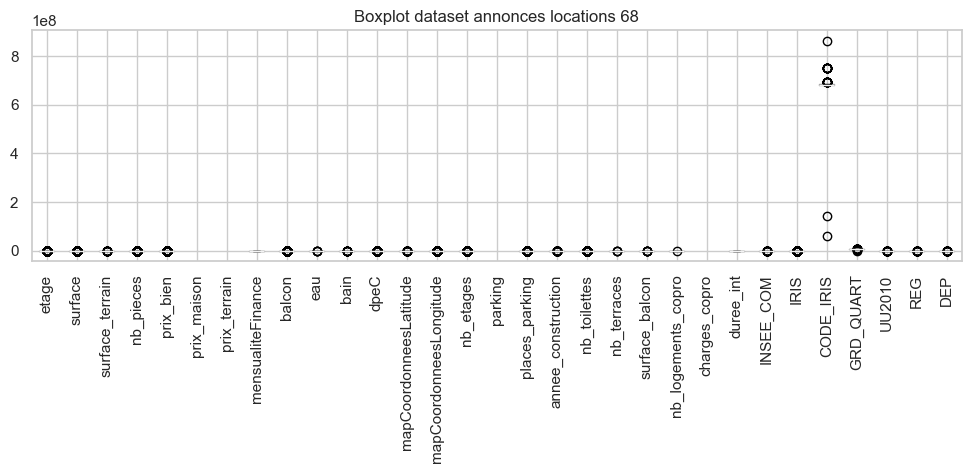

In [336]:
plt.figure(figsize=(12, 3))
plt.title("Boxplot dataset annonces locations 68")
rentals_df.boxplot(rot=90)
plt.show();

> Investigations sur les outliers

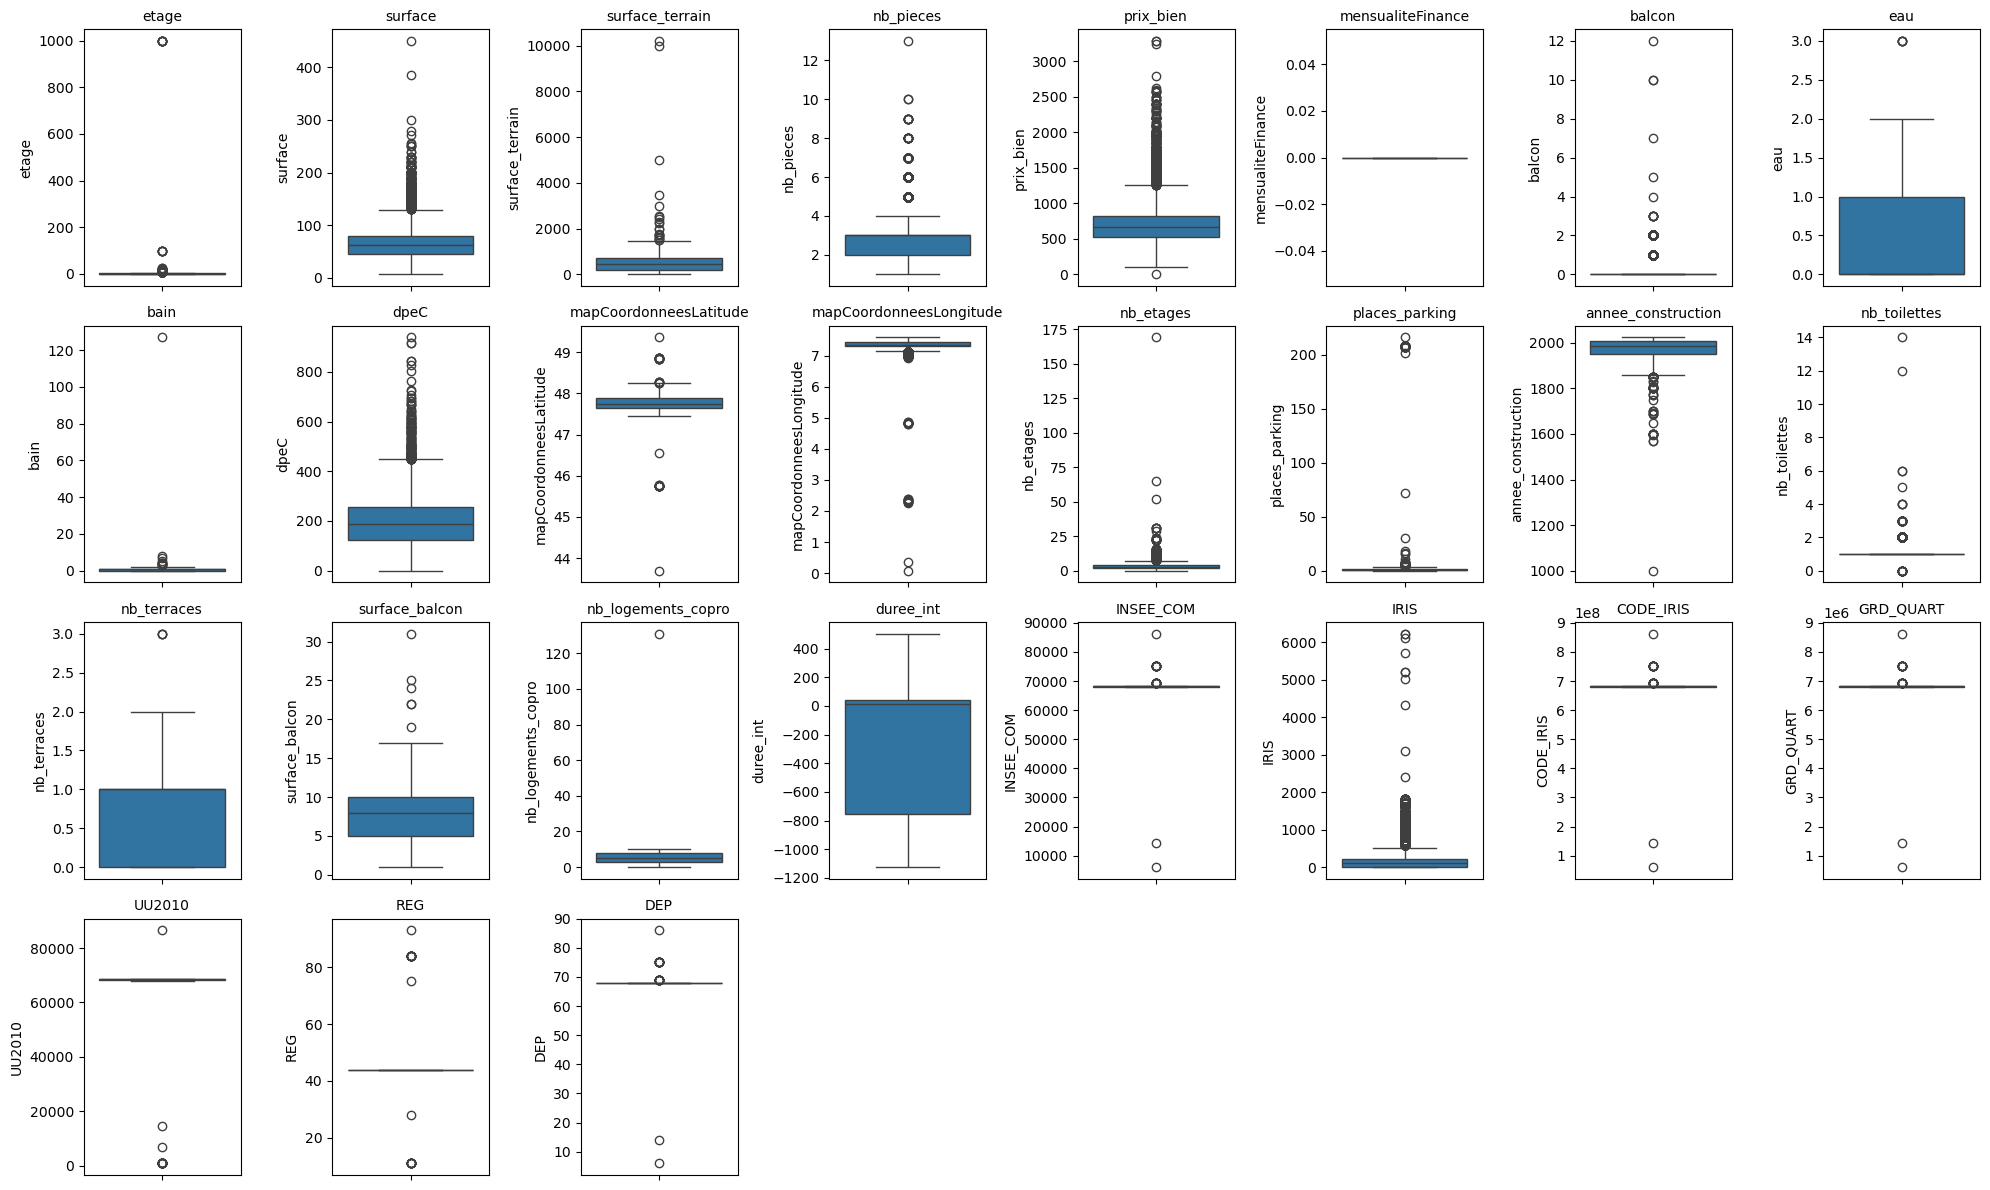

In [61]:
rentals_cleaned_df = rentals_df.dropna(axis=1, how='all')
num_cols = rentals_cleaned_df.select_dtypes(include='number').columns
plot_subplots(rentals_cleaned_df, num_cols, cols_per_row=8, fig_height=3, plot_function=sns.boxplot)

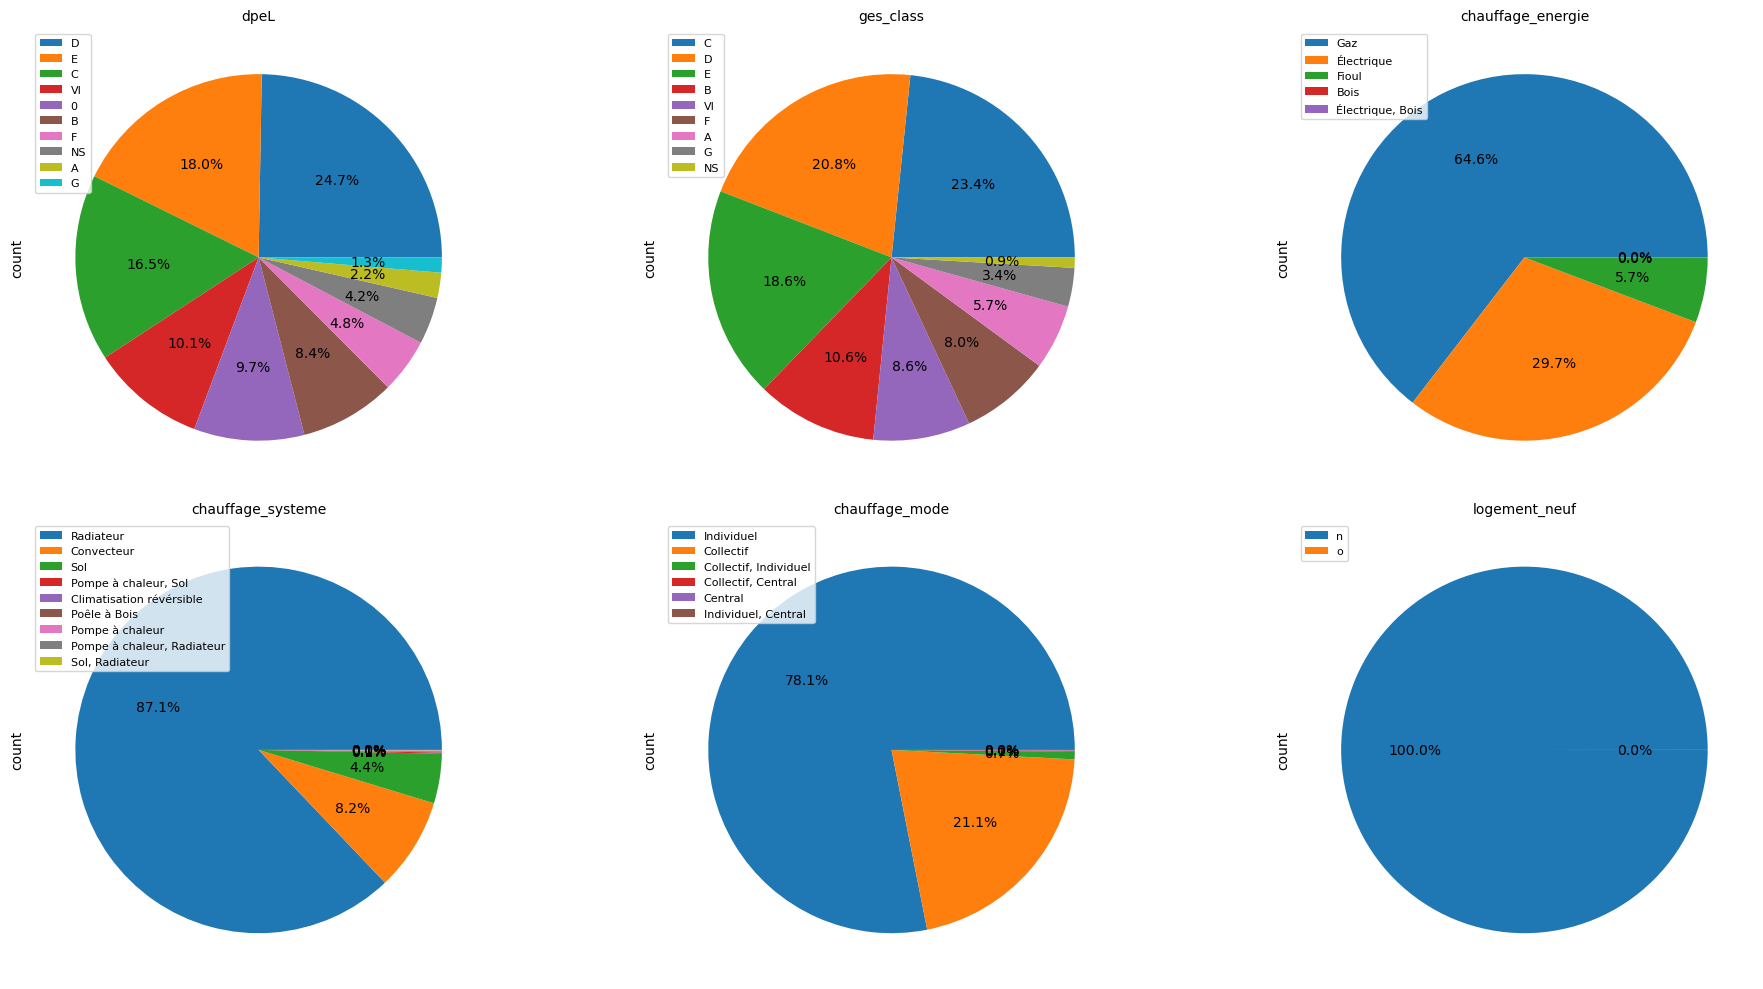

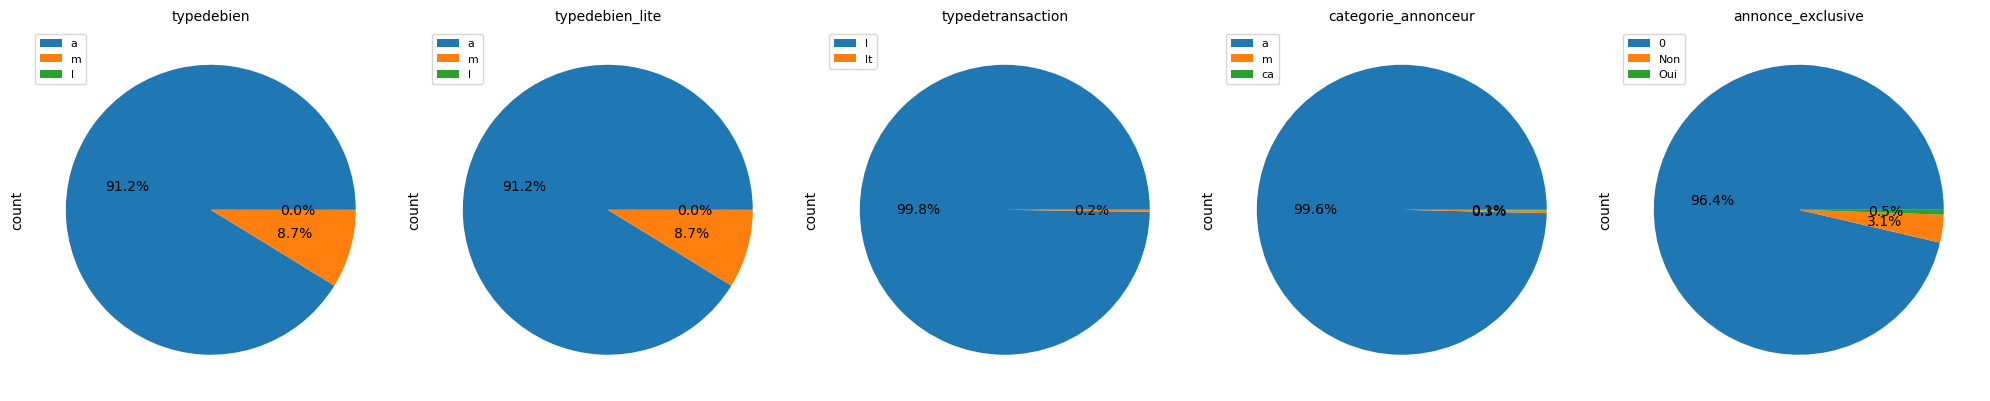

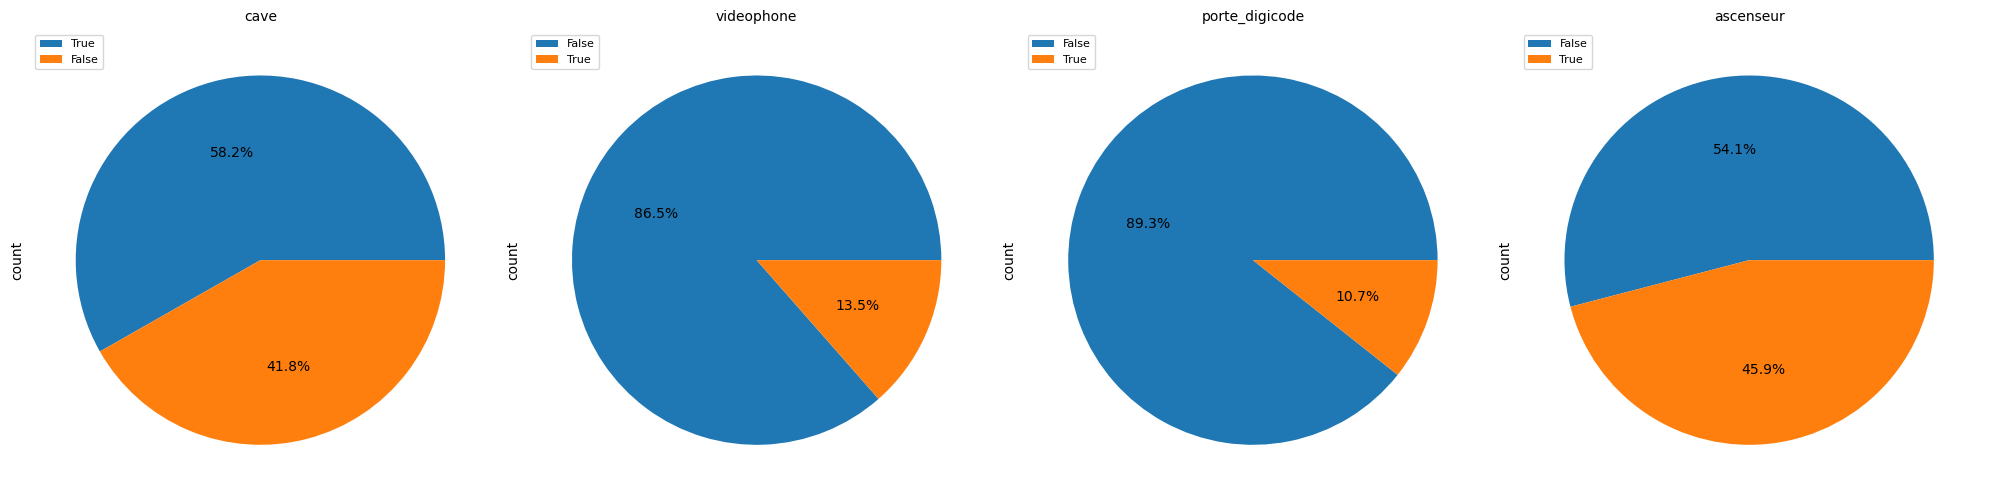

In [73]:
cols_energy = ['dpeL', 'ges_class', 'chauffage_energie', 'chauffage_systeme', 'chauffage_mode', 'logement_neuf']
plot_subplots(rentals_cleaned_df, cols_energy, cols_per_row=3, use_legend=True)

cols_types = ['typedebien', 'typedebien_lite', 'typedetransaction', 'categorie_annonceur', 'annonce_exclusive']
plot_subplots(rentals_cleaned_df, cols_types, cols_per_row=5, use_legend=True)

cols_options = ['cave', 'videophone', 'porte_digicode', 'ascenseur']
plot_subplots(rentals_cleaned_df, cols_options, cols_per_row=4, use_legend=True)

> Tests statistiques dataset locations

> **Informations corrélations**

In [314]:
num_cols = rentals_df.select_dtypes(include=['number'])
cat_cols = rentals_df.select_dtypes(include=['object'])

In [316]:
correlations = rentals_df.select_dtypes('number').corr(method='pearson')['prix_bien']
strong_correlations = correlations[(correlations >= 0.3) | (correlations <= -0.3)]
del strong_correlations['prix_bien']
correlation_df = pd.DataFrame({
    'Variable': strong_correlations.index,
    'Correlation': strong_correlations.values
}).set_index('Variable')

correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

correlation_df

,Correlation
Variable,
surface,0.807086
nb_pieces,0.748686
surface_balcon,0.503791
nb_toilettes,0.463176
nb_terraces,0.427709


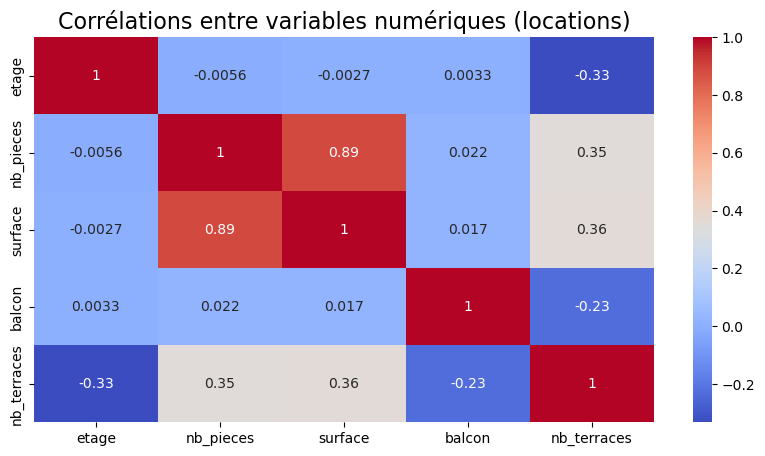

In [318]:
plt.figure(figsize=(10, 5))
sns.heatmap(rentals_df[['etage', 'nb_pieces', 'surface', 'balcon', 'nb_terraces']].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélations entre variables numériques (locations)", fontsize=16)
plt.show();

> Recherche des correlations entre les données

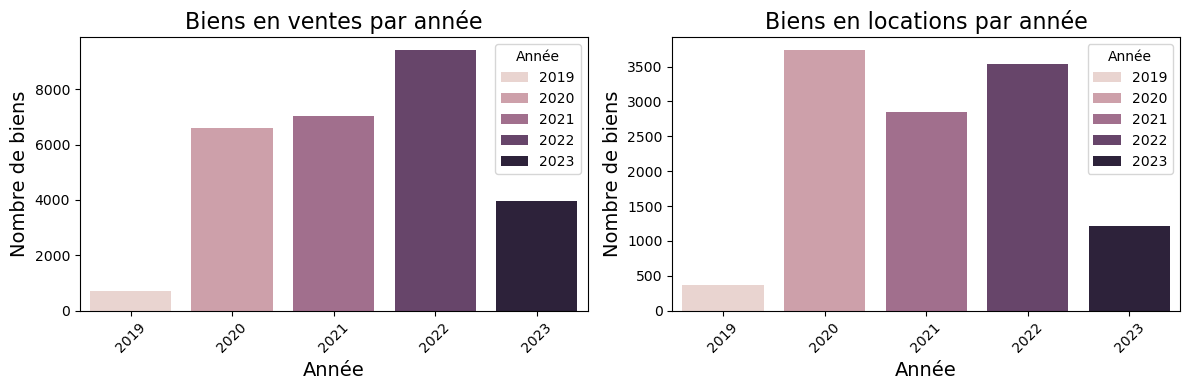

In [162]:
sales_df['year'] = pd.to_datetime(sales_df['date']).dt.year
sales_years_df = sales_df.groupby('year').size().reset_index(name='count')

rentals_df['year'] = pd.to_datetime(rentals_df['date']).dt.year
rentals_years_df = rentals_df.groupby('year').size().reset_index(name='count')

plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.barplot(data=sales_years_df, x='year', y='count', hue='year')
plt.title("Biens en ventes par année", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Nombre de biens", fontsize=14)
plt.legend(title="Année")
plt.xticks(rotation=45)

plt.subplot(122)
sns.barplot(data=rentals_years_df, x='year', y='count', hue='year')
plt.title("Biens en locations par année", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Nombre de biens", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Année")

plt.tight_layout()
plt.show();

---

### Visualisations datatest valeurs foncières data-gouv

In [361]:
output_path = f"../data/raw/full_years.csv.gz"
dvf_df = pd.read_csv(output_path, low_memory=False)

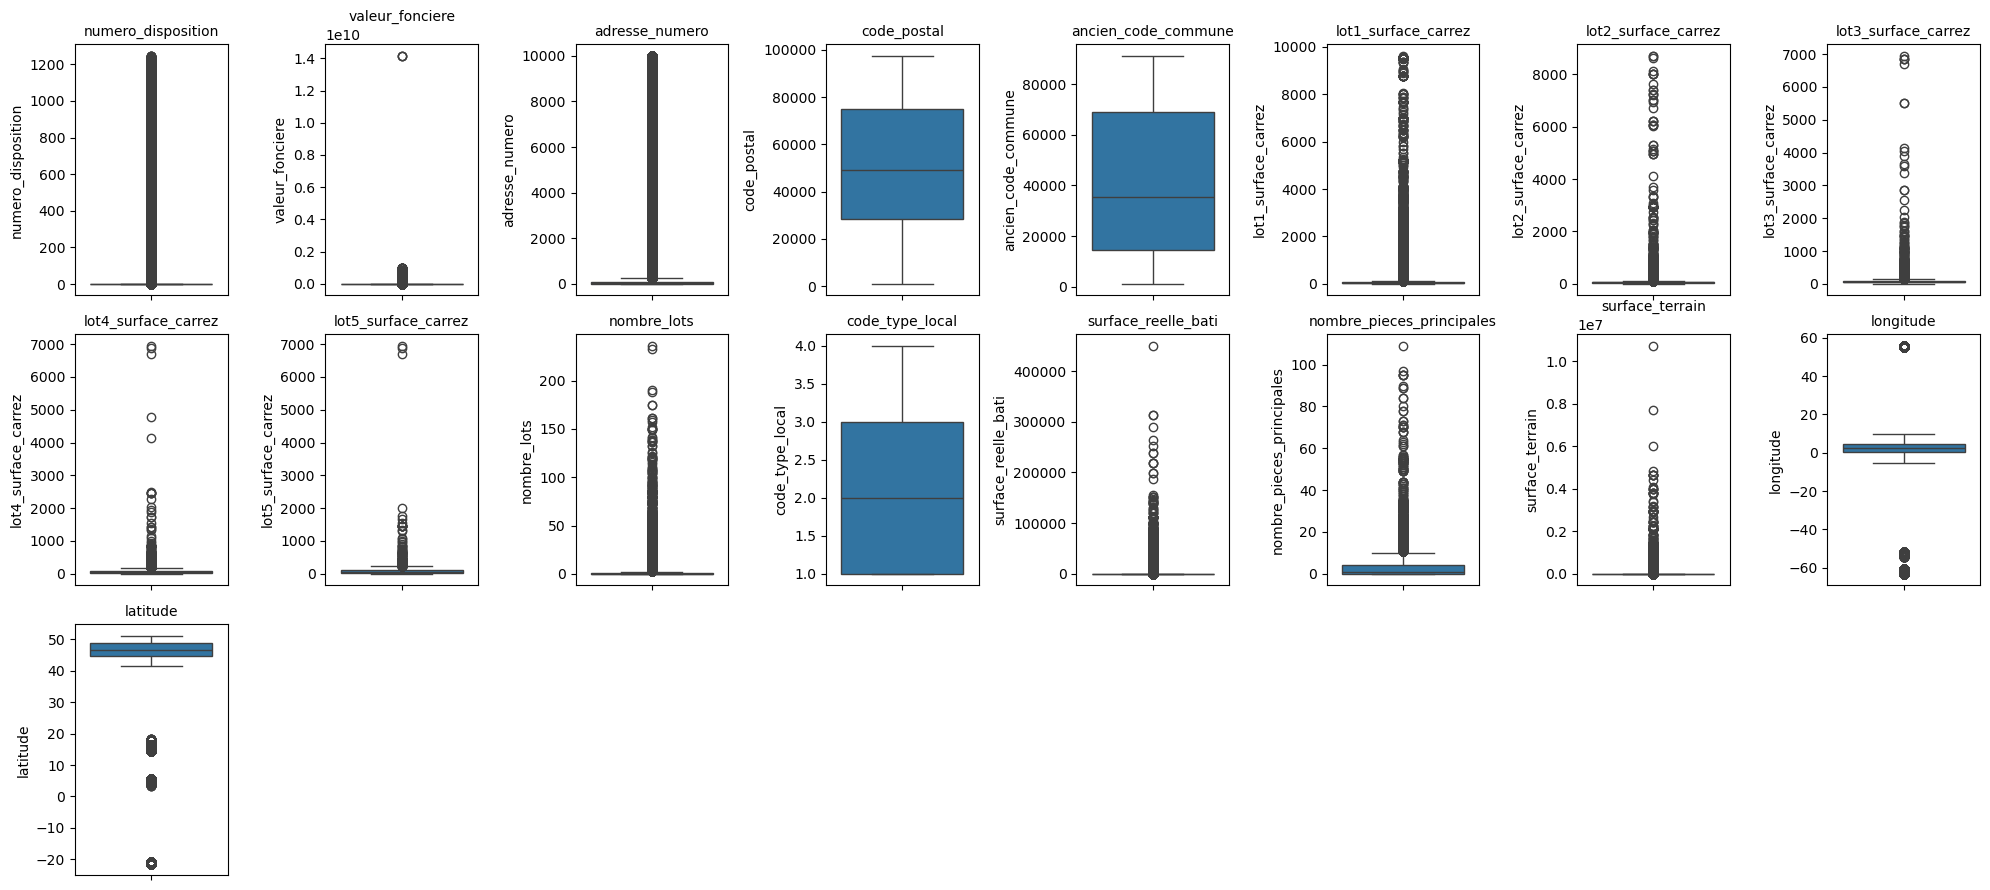

In [87]:
num_cols = dvf_df.select_dtypes(include=['number']).columns
plot_subplots(dvf_df, num_cols, cols_per_row=8, fig_height=3, plot_function=sns.boxplot)

In [23]:
num_cols = dvf_df.select_dtypes(include=['number']).columns
dvf_num = dvf_df[num_cols]

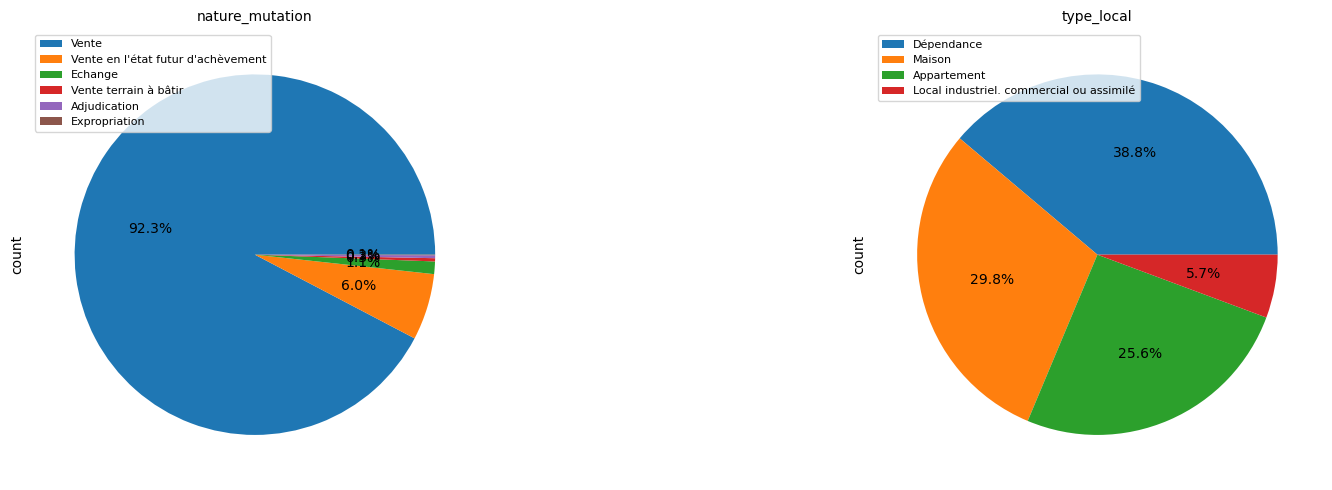

In [33]:
cols_types = ['nature_mutation', 'type_local']
plot_subplots(dvf_df, cols_types, cols_per_row=2, use_legend=True)

> **Informations corrélations**

In [373]:
# optimisation ressources computationnelles (2024 seulement)
output_path = f"../data/raw/full_2024.csv"
dvf_df = pd.read_csv(output_path, low_memory=False, nrows=50000)

In [375]:
num_cols = dvf_df.select_dtypes(include=['number'])
cat_cols = dvf_df.select_dtypes(include=['object'])

In [337]:
correlations = num_cols.corr(method='pearson')['valeur_fonciere']
strong_correlations = correlations[(correlations >= 0.3) | (correlations <= -0.3)]
del strong_correlations['valeur_fonciere']
correlation_df = pd.DataFrame({
    'Variable': strong_correlations.index,
    'Correlation': strong_correlations.values
}).set_index('Variable')

correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

correlation_df

,Correlation
Variable,
lot3_surface_carrez,0.339335
lot5_numero,0.326934
lot2_surface_carrez,0.303624


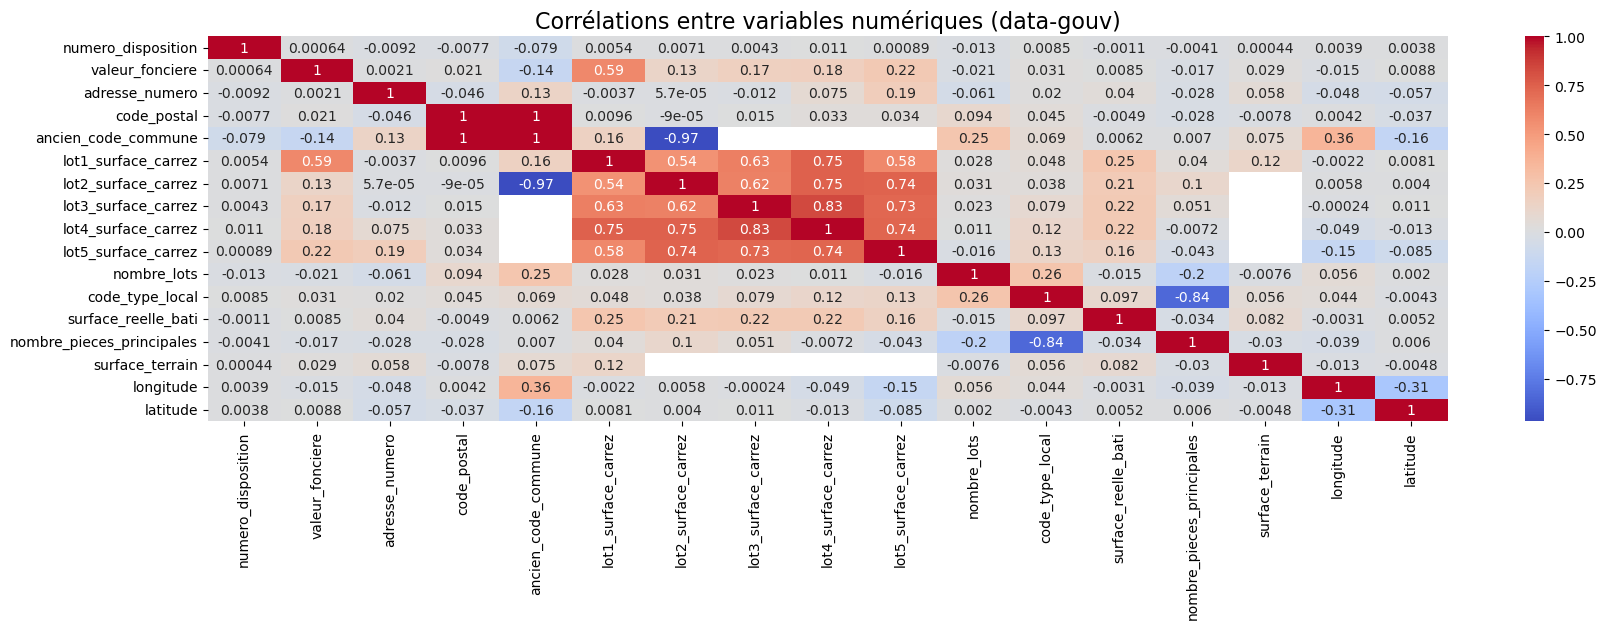

In [339]:
# num_cols = dvf_df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20, 5))
sns.heatmap(dvf_num.corr(), annot=True, cmap='coolwarm')
plt.title("Corrélations entre variables numériques (data-gouv)", fontsize=16)
plt.show();

In [341]:
threshold = 0.3
correlation_matrix = num_cols.corr()

cor_target = correlation_matrix["valeur_fonciere"].sort_values(ascending=False)

print("--- Matrice de correlation ---\n")
print("Variables corrélées\n")
print(cor_target[abs(cor_target) > threshold].index.tolist())

print("\nVariables non corrélées\n")
print(cor_target[abs(cor_target) < threshold].index.tolist())

--- Matrice de correlation ---

Variables corrélées

['valeur_fonciere', 'lot3_surface_carrez', 'lot5_numero', 'lot2_surface_carrez']

Variables non corrélées

['lot5_surface_carrez', 'lot1_surface_carrez', 'lot4_surface_carrez', 'code_postal', 'longitude', 'numero_disposition', 'code_type_local', 'surface_reelle_bati', 'surface_terrain', 'nombre_lots', 'adresse_numero', 'nombre_pieces_principales', 'latitude']


In [353]:
# Seuil de variance : 
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold=0.8)
v_threshold.fit_transform(num_cols)

print("--- Seuil de variance ---\n")
print("Variables corrélées\n")
print(num_cols.columns[v_threshold.get_support()].tolist())

print("\nVariables non corrélées\n")
print(num_cols.columns[v_threshold.get_support() == False].tolist())

--- Seuil de variance ---

Variables corrélées

['numero_disposition', 'valeur_fonciere', 'adresse_numero', 'code_postal', 'lot1_surface_carrez', 'lot2_surface_carrez', 'lot3_surface_carrez', 'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez', 'code_type_local', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain', 'longitude', 'latitude']

Variables non corrélées

['ancien_code_commune', 'ancien_id_parcelle', 'nombre_lots']


C:\Users\tabod\anaconda3\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [379]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * k))

cols_to_keep = []
cols_to_drop = []
cramers_results = {col: cramers_v(dvf_df[col], dvf_df["valeur_fonciere"]) for col in cat_cols if dvf_df[col].nunique() > 1}
for col, v in cramers_results.items():
    if v > threshold:
        cols_to_keep.append(col)
    else:
        cols_to_drop.append(col)


print("--- Vcramer ---\n")
print("Variables corrélées\n")
print(cols_to_keep)

print("\nVariables non corrélées\n")
print(cols_to_drop)

--- Vcramer ---

Variables corrélées

['id_mutation', 'date_mutation', 'nature_mutation', 'adresse_suffixe', 'adresse_nom_voie', 'adresse_code_voie', 'nom_commune', 'id_parcelle', 'lot1_numero', 'lot2_numero', 'lot3_numero', 'lot4_numero', 'type_local', 'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale', 'nature_culture_speciale']

Variables non corrélées

[]


In [377]:
# Kruskal Wallis
import scipy.stats as stats

cols_to_keep = []
cols_to_drop = []
kruskal_results = {}
for col in cat_cols:
    groups = [dvf_df[dvf_df[col] == cat]["valeur_fonciere"].dropna() for cat in dvf_df[col].unique() if len(dvf_df[dvf_df[col] == cat]) > 1]
    
    if len(groups) > 1:  # Vérifier qu'il y a au moins deux groupes
        stat, p_value = stats.kruskal(*groups)
        kruskal_results[col] = p_value

for col, p in kruskal_results.items():
    if p < 0.05:
        cols_to_keep.append(col)
    else:
        cols_to_drop.append(col)


print("--- Kruskal Wallis ---\n")
print("Variables corrélées\n")
print(cols_to_keep)

print("\nVariables non corrélées\n")
print(cols_to_drop)

--- Kruskal Wallis ---

Variables corrélées

['date_mutation', 'nature_mutation', 'adresse_suffixe', 'nom_commune', 'lot1_numero', 'lot2_numero', 'lot3_numero', 'lot4_numero', 'type_local', 'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale', 'nature_culture_speciale']

Variables non corrélées

['id_mutation', 'adresse_nom_voie', 'adresse_code_voie', 'id_parcelle']
